# Clustering and Frequent Item Sets

#### In this section, we will learn about how to use k-means, DBSCAN, Apriori and FP-Growth in python.


Following libraries are used for this algorithms:
- pandas
- numpy
- matplotlib
- mlxtend
- sklearn

In [1]:
# Import necessary modules

import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

##  Read and explore  Weather.csv

### Read data from Weather.csv

We use Weather.csv file as a data set for applying k-means, DBSCAN and Apriori algorithms. 

In [2]:
# Read data from the target CSV file 'Weather.csv', store the file contents in variable 'weather' which is Pandas.DataFrame

weather = pd.read_csv('Weather.csv')
weather.size
print(weather)

       Humidity  Temperature
0      2.072345    -3.241693
1     17.936710    15.784810
2      1.083576     7.319176
3     11.120670    14.406780
4     23.711550     2.557729
...         ...          ...
2995  85.652800    -6.461061
2996  82.770880    -2.373299
2997  64.465320   -10.501360
2998  90.722820   -12.255840
2999  64.879760   -24.877310

[3000 rows x 2 columns]


In [3]:
# Show first five rows in 'weather'
weather.head(5)

,Humidity,Temperature
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
# Show last five rows in 'weather'
weather.tail(5)

,Humidity,Temperature
2995,85.65280,-6.461061
2996,82.77088,-2.373299
2997,64.46532,-10.501360
2998,90.72282,-12.255840
2999,64.87976,-24.877310


In [5]:
# Show the name of the attributes in 'weather'
weather.columns

Index(['Humidity', 'Temperature'], dtype='object')

### Draw a diagram for finding distribution of data

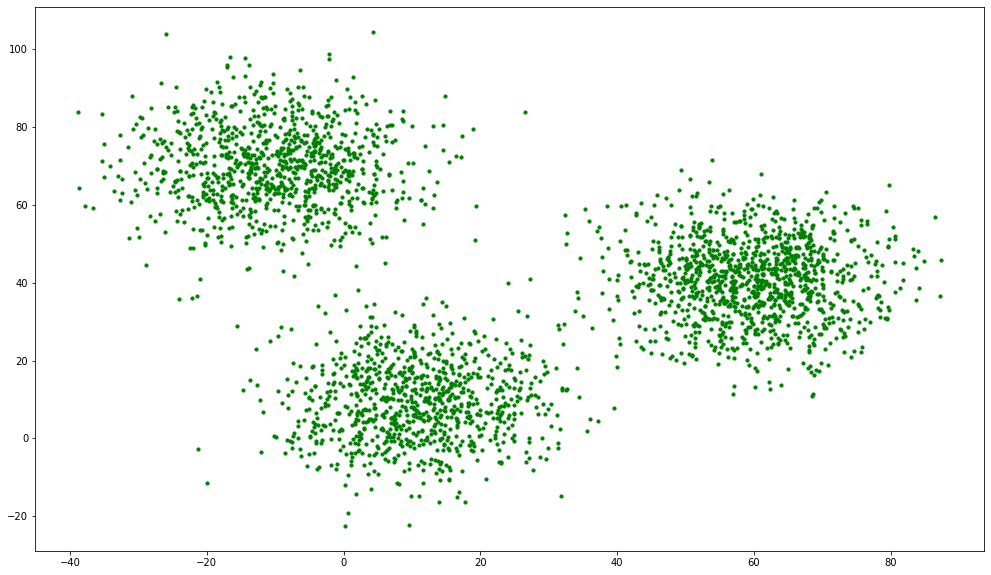

In [6]:
# Make a variable 'temerature' which is an array of values from column 'Temperature' in variable 'weather'.

# Make a variable 'humidity' which is an array of values from column 'Humidity' in variable 'weather'.

temperature =weather['Temperature'].values
humidity= weather['Humidity'].values

# Draw a scatter diagram for showing the distribution of data item in variable 'information' 

plt.rcParams['figure.figsize'] = (17, 10)
plt.scatter(temperature, humidity, c='green', s =10)

##  Experiments on k-means and DBSCAN by using Weather.csv
For applying k-means and DBSCAN we should use sklearn library.

In [7]:
# Import k-means module and DBSCAN module from sklearn

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

###  K-means 

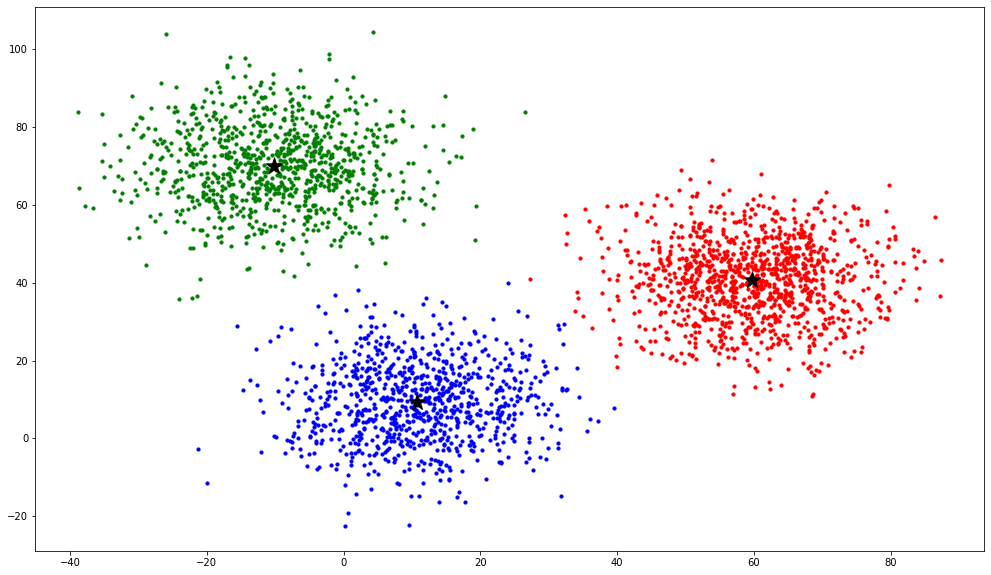

In [8]:
# Create variable 'weather_data'. Each row's of that is corresponding to the row in variable 'Weather' 

weather_data = np.array(list(zip(temperature, humidity)))

#Define 'cluster_num' for for number of clusters.

cluster_num = 3
kmeans = KMeans(cluster_num).fit(weather_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'm']
for cluster_index in range(cluster_num) :
    sub_set = np.array([weather_data[i] for i in range(len(weather_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

#### Question: Change the 'cluster_num' variable from 2 to 5. Which value clusters the data better?

### DBSCAN


[-1, 0, 1, 2]


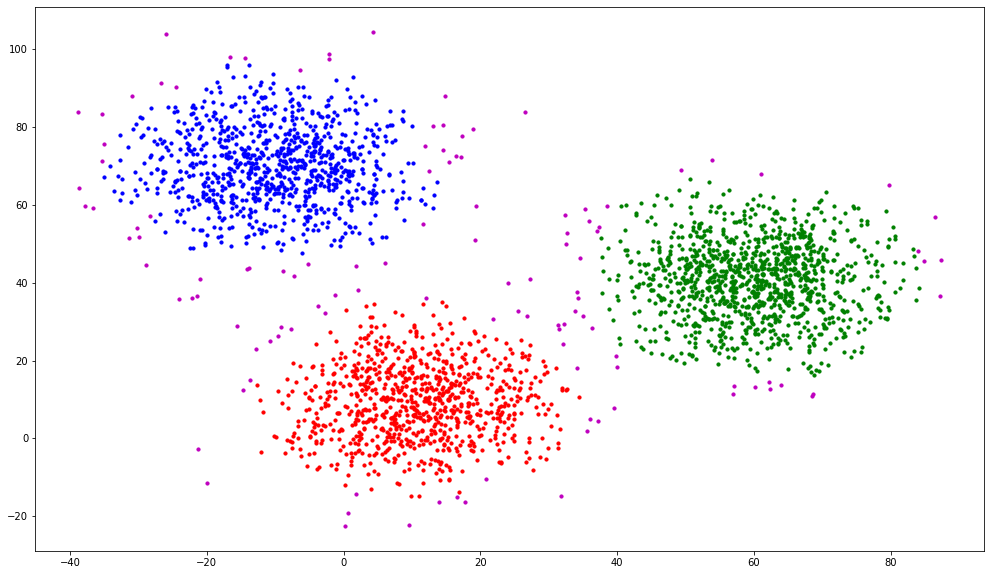

In [9]:
# Create variable 'weather_data'. Each row's of that is corresponding to the row in variable 'Weather' 
weather_data = np.array(list(zip(temperature, humidity)))

#Define 'eps' variable 4 and min_samples varibale 8.

dbscan = DBSCAN(eps = 4, min_samples=8).fit(weather_data)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()
print(cluster_indexs)

fig, plots = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'm']
for cluster_index in cluster_indexs :
    sub_set = np.array([weather_data[i] for i in range(len(weather_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])

#### Question: Change the 'eps' variable from 4 to 7 and min_samples from 8 to 11. Which value clusters the data better?

#### Question: Compare the result to the result from k-means when 'cluster_num = 3'. which result is better and why ?

### Dendograms

In [10]:

weather = pd.read_csv('Weather2.csv')
weather.size
print(weather)

     Humidity  Temperature
0    2.072345    -3.241693
1   17.936710    15.784810
2    1.083576     7.319176
3   11.120670    14.406780
4   23.711550     2.557729
5   24.169930    32.024780
6   21.665780     4.892855
7    4.693684    12.342170
8   19.211910    -1.121366
9    4.230391    -4.441536
10   9.127130    23.605720
11   0.407503    15.297050
12   7.314846     3.309312
13  -3.438403   -12.025270
14  17.639350    -3.212345
15   4.415292    22.815550
16  11.941220     8.122487
17   0.725853     1.806819
18   8.185273    28.132600
19  -5.773587     1.024800
20  18.769430    24.169460
21   7.752016    -3.334991
22  10.611320    28.443780
23   2.021650    -4.687122
24   5.145525    11.186000
25   6.243310    19.477160
26 -11.706710     8.073185
27   7.255978    14.637040
28   3.392373     1.220712
29  24.299900    40.428870
30   4.094005     6.944695
31  11.803580    -2.445336
32   0.092288    -6.651035
33  28.506070    -9.091833
34  23.408310     7.931438
35  10.563050    12.544680
3

    Humidity  Temperature
0   2.072345    -3.241693
1  17.936710    15.784810
2   1.083576     7.319176
3  11.120670    14.406780
4  23.711550     2.557729
   Humidity  Temperature
0  0.538622    -0.842547
1  0.750703     0.660640
2  0.146450     0.989218
3  0.611040     0.791600
4  0.994232     0.107246


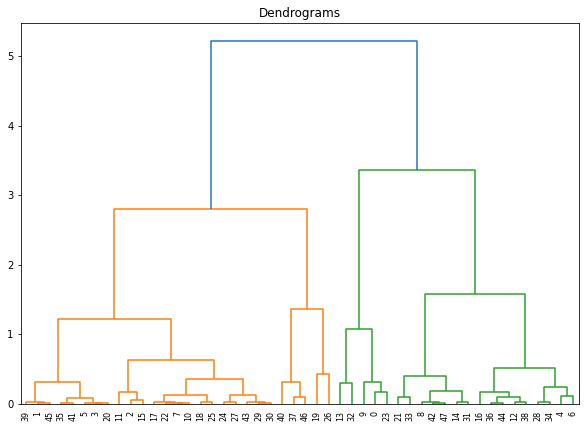

In [11]:

data=weather
print(data.head())

from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
print(data_scaled.head())

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

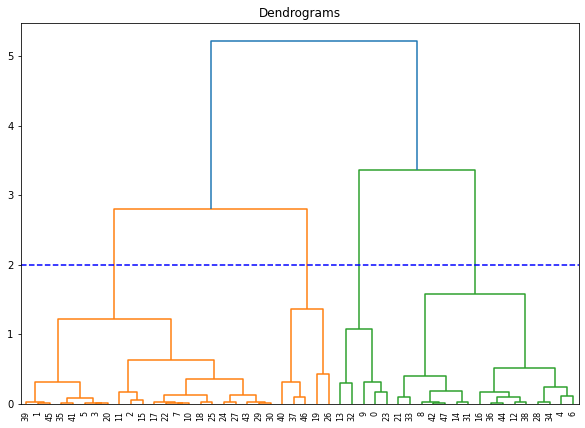

In [12]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=2, color='b', linestyle='--')

plt.show()

### Agglomerative Clustering

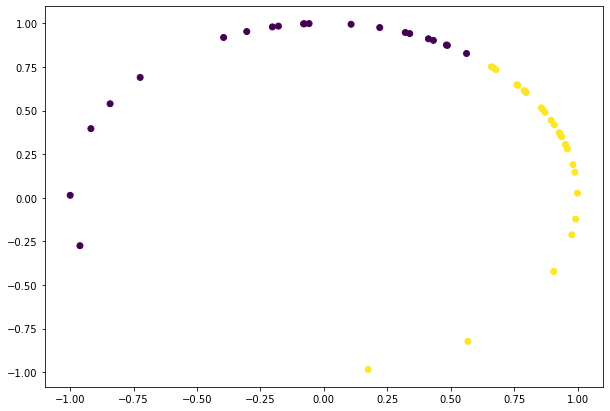

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_)

plt.show()

###  Apriori algorithm 

In [2]:
# Import Apriori module and TransactionEncoder module from mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

In [14]:
# Read data from file Repair.csv and 
repair_data = []
with open("Repair.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        repair_data.append(row)

#Show 3 first rows of repair_data

repair_data[0:3][:]

ParserError: Error tokenizing data. C error: Expected 9 fields in line 2, saw 14


In [9]:
# learn to use TransactionEncoder module to convert an array to DataFrame for Apriori algorithm in mlxtend

te = TransactionEncoder()
te_ary = te.fit(repair_data).transform(repair_data)
data = pd.DataFrame(te_ary, columns = te.columns_)
data.head(10)

,Analyze Defect,Archive Repair,Inform User,Register,Repair (Complex),Repair (Simple),Restart Repair,Test Repair
0,True,True,True,True,True,False,False,True
1,True,True,True,True,False,True,True,True
2,True,True,True,True,True,False,False,True
3,True,True,True,True,False,True,False,True
4,True,False,True,True,True,False,False,True
5,True,False,True,True,False,True,False,True
6,True,False,True,True,False,True,True,True
7,True,False,True,True,False,True,False,True
8,True,False,True,True,False,True,False,True
9,True,False,True,True,True,False,False,True


In [17]:
# learn to use Apriori algorithm from mlxtend

frequent_itemsets = apriori(data, min_support = 0.4, use_colnames = True)
frequent_itemsets

,support,itemsets
0,1.000000,(Analyze Defect)
1,0.905797,(Archive Repair)
2,0.998188,(Inform User)
3,1.000000,(Register)
4,0.596920,(Repair (Complex))
...,...,...
74,0.550725,"(Repair (Complex), Register, Analyze Defect, T..."
75,0.595109,"(Repair (Complex), Register, Analyze Defect, T..."
76,0.438406,"(Register, Analyze Defect, Test Repair, Repair..."
77,0.550725,"(Repair (Complex), Register, Test Repair, Info..."


#### Question: Change the value of min_support. What is the effect of that on number of itemsets?